# Module 6: Exploratory Data Analysis (EDA)

## Table of Contents
<br>

<a href="#Module 6: Exploratory Data Analysis"><font size="+1">Module 6: Exploratory Data Analysis</font></a>
<ol>
  <li>What is EDA?</li>
  <li>Corpus Linguistics for EDA</li>
  <li>Corpus Linguistics - Method 1: Word Frequency Analysis</li>
  <li>Corpus Linguistics - Method 2: Concordance</li>
  <li>Corpus Linguistics - Method 3: Collocation</li>
  <li>Corpus Linguistics - Method 4: Keyness</li>
</ol>

**Learning Outcomes:** 


* Describe the 4 key techniques in corpus linguitics
* Extract raw frequencies, concordance, collocations and keyness from the corpus under study
* Calculate lexical diversity.
* View lexical dispersion on selected tokens
* List the benefits that concordance tools can bring to linguistics analysis
* View lexical dispersion on selected tokens

<br>

In [ ]:
# Import libraries used
from collections import Counter
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.data.path.append("../local_packages/nltk_data")
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

NLP isn't just a set of techniques and ideas, we want to be able to answer questions and understand our data using these techniques. In future we will be able to build NLP models, perform machine learning and extract knowledge from our text data. Before that we need to be able to manipulate and gain basic insights from the text. In this chapter we will explore methods used to investigate text data.

### 6.1 What is EDA?

As the name suggests, you’re exploring – looking for clues!

Tukey (1977) calls it: “*detective work*”

For example:

<ul>
  <li>Establishing the data’s underlying structure</li>
  <li>Identifying mistakes and missing data</li>
  <li>Establishing the key variables</li>
  <li>Establishing the data’s underlying structure</li>
  <li>Spotting anomalies</li>
  <li>Checking assumptions and testing hypotheses in relation to a specific model</li>   
</ul>


The above analysis is done to:


<ul>
  <li>Discover Patterns</li>
  <li>Spot Anomalies</li>
  <li>Frame Hypothesis</li>
  <li>Check Assumptions</li>
</ul>


EDA is used in conjuction with **Confirmatory Data Analysis** where you evaluate your evidence using traditional statistical tools such as significance, inference, and confidence.


All of the below could be viewed as exploratory/confirmatory data analysis.

<ul>
  <li>Get a feel of the data, describe the data, look at a sample of data like first and last rows</li>
  <li>Perform data profiling (informative summaries about the data eg mean, median, mode)</li>
  <li>Define the feature variables that can potentially be used for machine learning</li>
  <li>Recognise the challenges posed by data - missing values, outliers</li>
  <li>Examine key words in context, most frequently occuring words</li>
  <li>Perform cluster analysis to determine how linguistic features are related</li>
  <li>Apply methods to uncover topics in the text</li>  
  <li>Hypothesis/significance testing</li>
  <li>Regresssion/Variance Analysis</li>   
</ul>


In order to explore our data we will often need to manipulate it, restructure it and transform it into different formats in order to get the text analysis ready. For this reason it is crucial to be familiar with basic data structures in Python.


### 6.2 Corpus Linguistics for EDA

Corpus linguistics is a field which focusses upon a set of methods for studying language.

It is the **scientific study of language on the basis of text corpora.** 

It is not a monolithic, consensually agreed set of methods and procedures. 

It is a heterogeneous field – although there are some basic generalisations that we can make.

Corpus linguistics invloves gathering a **corpus** (homogeneous, of a particular genre).

A corpus (plural corpora) is a **collection of texts** used for linguistic analyses. *Corpus* is latin for "body".

Such corpora generally comprise hundreds of thousands to billions of words and are not made up of the linguist’s or a native speaker’s invented examples but based on **authentic naturally occurring spoken or written usage.**

<br>


**Types of corpora and some famous (English) examples**

Below are some example corpuses which are curated and commonly used as benchmarks. You do not need to learn them, but they can be useful resources for testing your models and exploring.

*Balanced, representative* <br>
Texts selected in pre-defined proportions to mirror a particular language or language variety.<br>
Examples:
BNC: British National Corpus <br>
<ul>
  <li>100 m words, 10% spoken</li>
  <li>Carefully composed to be ‘balanced’</li>
</ul>

*Monitor* <br>
New texts added, to ‘monitor’ language change.<br>
Examples:<br>
BoE: Bank of English 
<ul>
  <li>Written and spoken, much newspaper/media language</li>
  <li>Different varieties and text categories</li>
  <li>Part can be searched online</li>
</ul>


*Parallel (translation)* <br>
Same texts in two (or more) languages <br>
Examples:<br>
OPUS open source parallel corpus 
<ul>
  <li>Access to aligned corpora, mainly EU texts.</li>
  <li>Unknown size</li>
</ul>


*Comparable* <br>
Similar texts in two, or more, languages or language varieties <br>
Examples:<br>
ICE: International Corpus of English 
<ul>
  <li>Different varieties of English (British, Irish, EastAfrican, etc)</li>
  <li>50% spoken</li>
  <li>Some freely available</li>
</ul>


*Diachronic* <br>
Include texts from different (consecutive) periods, preferable comparable ones <br>
Examples: <br>
Helsinki Corpus of English Texts <br>
<ul>
  <li>Old, Middle, and Early Modern English</li>
  <li>Text samples</li>
</ul>

<br>

**Typically 4 Key methods are used in Corpus Linguistics**

<ul>
  <li>Word Frequency Analysis </li>
  <li>Concordance</li>
  <li>Collocation</li>
  <li>Keyness</li>
</ul>


**Key terms**

<ul>
  <li>Types: Number of distinct words in a corpus (size of the vocabulary)</li>
  <li>Tokens: Number of running words</li>
</ul>
<br>


"*They picnicked by the wadi, then lay back on the sand and looked at the stars*"

- 16 word tokens, 14 word types (not counting punctuation)



### 6.3 Corpus Linguistics - Method 1: Word Frequency Analysis

Word Frequency: A simple tallying of the number of instances of something that occurs in a corpus


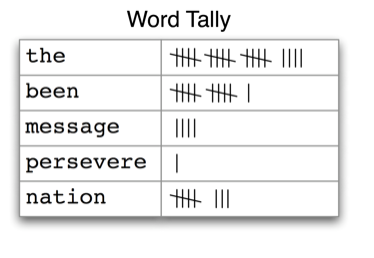


**Zipf’s Law**

Zipf noticed that the second most common word ‘*of*’ occurs about half as often as the most common word ‘*the*’. While the third most common word ‘*to*’ occurs about a third as often as ‘*the*’. And so on.

Generally, the frequency of the *nth* most common word is about *1/n* times the frequency of the most common word.
So a graph of the frequencies of the most common words looks roughly like this (please note that larger corpora may produce observed frequencies closer to Zipf's Law):


![zipfs law demonstrated using Gutenberg data](../pics/zipf.png)


Language after language, corpus after corpus, linguistic type after linguistic type we observe the same “*few giants, many dwarves*” pattern. This means that a handful of common words appear much more frequently than other high frequency words.
<br>

**Normalised Frequency**

The most basic statistical measure is a frequency count, as shown above. 

There are 1,103 examples of the word *Lancaster* in the written section of the British National Corpus (BNC).

This maybe expressed as a percentage of the whole corpus; the BNC’s written section contains **87,903,571** words of running text, meaning that the word *Lancaster* represents 0.013% of the total data in the written section of the corpus. 

The percentage is just another way of looking at the count 1,103 in context, to try to make sense of it **relative to the totality of the written corpus**.

Sometimes, as is the case here, the percentage may not convey meaningfully the frequency of use of the word, so we might instead produce a **normalised frequency (or relative frequency)**, which answers the question "**how often might we assume we will see the word per x words of running text?**"

Normalised frequencies are usually given **per thousand words or per million words.**

(McEnery and Hardie, 2012)



$$Normalized~freq = (\frac{raw~freq}{token~number}) \times common~base$$


Import Data (Spam/Ham Dataset) https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research.

It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

**Note:** this data set contains *real* messages, using the full range of human language which you may see in practice. There may be explicit or inappropriate language used. This does not reflect the views of the ONS or Civil Service. 

We are going to load in the data, perform some processing and exploration of the description text.

In [ ]:
spamham_data = pd.read_csv("../data/SMSSpamCollection.csv", encoding='iso-8859-1')

In [ ]:
spamham_data.head()

In [ ]:
# show the split of counts for each type of email, spam or ham
spamham_data["Email"].value_counts().plot(kind='pie',
                                          explode=[0, 0.1],
                                          figsize=(6,6),
                                          autopct='%1.1f%%',
                                          shadow=True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
# Some utility preprocessing functions for use later.

def remove_punct(ptext):
    
    for each_punctuation_mark in string.punctuation:
        ptext = ptext.replace(each_punctuation_mark, "")
        
    return ptext


stop_words = set(stopwords.words('english'))


def clean_stopwords(token):
    return [item for item in token if item not in stop_words]


def return_tostring(token):
    return " ".join(token)


In [ ]:
# A quick look at the text column
spamham_data["Description"].sample(10, random_state=1).to_list()

In [ ]:
# Get tokens in description column
results = Counter()

# clean the data, basic tokenization, 
# give the text to the Counter object for counting
spamham_data["Description"].str.lower().str.split().apply(results.update)

# the number of tokens = the sum of frequencies of each unique word
print("Tokens:", sum(dict(results).values()))

In [ ]:
# We can look up the count of each word from this dictionary
results["the"]

Below we are going to preprocess our tokens a using:

* lowercasing
* punctuation removal
* tokenization
* stopword removal

Consider what would happen if we chose a different order?

In [ ]:
# Lowercase the Description data
spamham_data["Description"] = spamham_data["Description"].str.lower()

In [ ]:
# Remove punctuation
spamham_data['Description'] = spamham_data['Description'].apply(remove_punct)

In [ ]:
# Tokenise in a basic manner
spamham_data["Description"] = spamham_data["Description"].apply(nltk.word_tokenize)

In [ ]:
# Remove stopwords
spamham_data['Description'] = spamham_data['Description'].apply(clean_stopwords)

In [ ]:
spamham_data['Description']

In [ ]:
# We want one full list of tokens to be analysed
alltext = []
for item in spamham_data['Description']:
    # extend is similar to append, but combines lists into
    # one larger list
    alltext.extend(item)
    
print(alltext[:100])

In [ ]:
# A quick look at our frequency dictionary
counter = Counter(alltext)
print(counter)

If we want to plot the distribution of these counts we will need to order them, then split them into two lists. One of the tokens, and one of the corresponding counts.

In [ ]:
# calling .most_common() on our Counter
# object will sort them for us
counter.most_common()

In [ ]:
# separate out the tokens and counts into lists
tokens, counts = zip(*counter.most_common())

In [ ]:
def plotall(px, py):
    
    plt.xticks(fontsize=12, rotation=90)
    plt.ylabel('Frequency')
    plt.xlabel("Tokens")
    plt.bar(px, py)
    plt.show()

In [ ]:
# select only the top 10 of each
plotall(tokens[:10], counts[:10])

In [ ]:
# Return lists to strings
spamham_data['Description'] = spamham_data['Description'].apply(return_tostring)

In [ ]:
spamham_data['Description'].head()

We can make a wordcloud for the description column

The description column is concatenated (joined) into one big string called text first. This will give us one big long string of all the text. This is not useful for all analyses, but for overall wordcounts can be helpful. The wordclouds object is expecting a string. We can process the text however we want before handing it over to the visualisation step.

In [ ]:
# Join all the text data
text = " ".join(spamham_data['Description'])

# The text string is then passed to the wordcloud function:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This is shows an extremely interesting snapshot of language. You can imagine than not all of these words are spelled the same as in a formal document. Reading works like "ur" we know that it refers to the same thing as "your", however how can our analysis do the same?

The way in which we process our text data should be different for each text we work with. Some processing steps are not relevant here. For example, if we removed all words of lengths two or one then we would lose some key insight. "da, ur, ok, u, n" would not appear. If we removed digits from the text then we would lose "2", even when we know it is refering to "to". 

Language is constantly evolving, a dialect from today, or in some part of society will be very different from the same language in a different time and place. For that reason there are no rules or processes that work for all texts. It is up to us as the scientist / analyst to determine how to apply the tools we know to the job at hand.

In [ ]:
# useing the `results` counter from previously

# Get the first 20 items
top_20 = results.most_common(20)

# Seperate out word types from counts
word_type_list, word_type_count_list = zip(*top_20)

In [ ]:
# Show zipf's law in action
plotall(word_type_list, word_type_count_list)

In [ ]:
# Get the word types
# word types are the unique words in a corpus

# create an empty set, which contains only unique elements by definition
unique_words = set()

# perform basic cleaning, the text already has been processed, and tokenize
spamham_data["Description"].str.lower().apply(nltk.word_tokenize).apply(unique_words.update)

# the length of the set is therefore the number of unique columns
print("Word Types:", len(unique_words))

In [ ]:
# If we normalize the text, such as with stemming or lemmatization,
# the number of unique words; word types would decrease. This wouldn't be representative
# of the raw text however.

# If we do not lowercase the text, we will have even more types
# (note the text in ["Description"] is already lowerased)

**Measure Lexical Diversity**

<br>


Lexical Diversity is “**the range of different words used in a text, with a greater range indicating a higher diversity**”.

Imagine a text which keeps repeating the same few words again and again – for example: *‘manager‘, ‘thinks‘ and ‘finishes‘*.

Compare this with a text which avoids that sort of repetition, and instead uses different vocabulary for the same ideas, *‘manager, boss, chief, head, leader‘, ‘thinks, deliberates, ponders, reflects‘.*

The second text is likely to be more complex and more challenging to model and gain insight from. A simple count of a specific word will mean less to us if a wide range of words are used to express the same idea.  

The second text is said to have more **‘Lexical diversity’** than the first text, and this is why Lexical Diversity (LD) is thought to be an important measure of text difficulty.

**Type Token Ratio:** the number of different words (types) / all words produced (tokens)

$$TTR = \frac{\# ~types}{\# ~tokens}$$

It maybe useful to know difference in LD between ham and spam text

In [ ]:
# lets split up the texts
ham = spamham_data[spamham_data["Email"] == "ham"]
spam = spamham_data[spamham_data["Email"] == "spam"]

In [ ]:
# Join all the data into one string to analyse the whole corpus
all_ham_text = " ".join(list(ham['Description']))
all_spam_text = " ".join(list(spam['Description']))

In [ ]:
# quick look at the result
all_ham_text

In [ ]:
# LD for ham
total_token_ham = nltk.word_tokenize(all_ham_text)
total_wordtype_ham = set(total_token_ham)

print("Lexical Diversity for ham:", len(total_wordtype_ham) / len(total_token_ham ))

In [ ]:
# LD for spam
total_token_spam = nltk.word_tokenize(all_spam_text)
total_wordtype_spam = set(total_token_spam)

print("Lexical Diversity for spam:", len(total_wordtype_spam) / len(total_token_spam ))

The lexical diversity for spam is greater than that for ham. This is quite interesting, there are more unique types in spam per token than in real text. This tells us that real people are using a more narrow range of vocabulary in everyday conversation than text created to sell things (or other spam related purposes).

<br>

**Measure Lexical Dispersion**

The location of a word can be determined. It can be established for example how many words from the beginning it appears. 

This positional information can be displayed using a **dispersion plot**. Each stripe represents an instance of a word, and each row represents the entire text.

In [ ]:
# Measure the dispesion of the text
# Tokenise the data
ham_text_tokens = nltk.word_tokenize(all_ham_text) 

In [ ]:
ham_text_object = nltk.Text(ham_text_tokens) #turning it into nltk.Text object to be able to use .condordance, .similar etc
ham_text_object.dispersion_plot(["call", "service", "text"])

The word ofset in the above is an index indicating the position of each word occurance in the text overall. Word Offset 0 would be the first word in the text, 100 would be 100 after the first word, and so on. We can use offsets to navigate around the text. In our example we have joined a large number of texts together, so it is not clear where the distinction between documents are, but would could find out where each starts and mark it. This way we can work with all the text, but be able to maintain some structure.

From this we can see "call" is highly frequent across the text. "service" is used rarely, but in groups. If we looked closer, or at more specific text we could see relationships between the words, which will be looked at below. 

### 6.4 Corpus Linguistics - Method 2: Concordance

The frequency count of types that we did above is useful to a certain extent.

To explore a word's frequency in more detail, we can look at its use in **context**. To do this, we create a **concordance**. Making a concordance will put the target word in the middle and show you what the surrounding text looks like. 

Also known as **keyword in context or KWIC**. 

Using a `nltk` text object we can use the concordance method to generate the context of a word's occurance.

In [ ]:
# generate concordance from text and given token
ham_text_object.concordance('later')

### 6.5 Corpus Linguistics - Method 3: Collocation

Words tend to appear in typical, recurrent combinations:


<ul>
  <li>day and night</li>
  <li>ring and bell </li>
  <li>milk and cow</li>
  <li>kick and bucket</li>
  <li>brush and teeth </li>
</ul>

The above are known as **collocations**

The meaning of a word is in part determined by its characteristic.

Empirically, collocations are words that have a tendency to occur near each other. 

Words do not randomly appear together. Some of those co-occurrence are extremely consistent and bear meaning with them. 

Collocation are important for us to look at when we study language, and it’s really the mass observation of co-occurrence in corpus data that allows us to begin to measure the extent to which words are coming together in order to form meaning.


In [ ]:
# helper function to find most frequent cooccurance words
# nltk has a helpful collocations.BigramCollocationFinder object
# this function will create a table for us to analyse


def generate_collocations(tokens):
    '''
    Given list of tokens, return collocations and frequencies in a frames.
    '''
    ignored_words = nltk.corpus.stopwords.words('english')
    
    # remove words of length < 3, or stopwords
    bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
    bigramFinder.apply_word_filter(lambda word: len(word) < 3 or word.lower() in ignored_words)
    
    bigram_freq = bigramFinder.ngram_fd.items()
    
    bigramFreqTable = (pd.DataFrame(list(bigram_freq), columns=['bigram','freq'])
                       .sort_values(by='freq', ascending=False))
   
    return bigramFreqTable


In [ ]:
# given our long string of all the data find the bigram collocationss
generate_collocations(ham_text_tokens).head(50)

### 6.6 Corpus Linguistics - Method 4: Keyness

Keywords are those whose frequency is unusually high in comparison with some norm. This is a useful general concept we want to keep in mind when exploring text.

In order to identify significant differences between 2 corpora or 2 parts of a corpus, we often use a statistical measure called **keyness**.

Imagine two highly simplified corpora. Each contains only 3 different words *cat, dog, and cow* and has a total of 100 words. 

The frequency counts are as follows:

**Corpus A: cat 52; dog 17; cow 31** 

**Corpus B: cat 19; dog 40; cow 31** 

*Cat* and *dog* would be key, as they are distributed differently across the corpora, but cow would not as its distribution is the same. 

Put another way, cat and dog are distinguishing features of the corpora; cow is not.

Normally, we use a concordancing program like **AntConc or WordSmith** to calculate keyness for us.

There are other methods too for quantifying how important a word is within a corpus, such as TF-IDF, these will be discussed within Intermediate NLP Module 7 - Feature Representation.

##### Exercises
<br>

<ol>
  <li>Import the Hep Dataset and perform EDA as outlined below to the text column.</li>
    
    
  <li>              Plot the top 10 highest frequency words. </li>
  <li>              Calculate the normalised frequency for top 10 most frequently occurring words. </li>
  <li>             Create a word cloud for the top 100 words (in terms of frequency) </li>
  <li>              Calculate the lexical diversity for the text  </li>
  <li>              Show keyword in context for the top 10 words. </li>
  <li>              Generate collocations </li>

     
</ol>




#### References



https://www.cambridge.org/core/books/corpus-linguistics/16CC177EA9B6007B3187C64326F818AB